# Analyse de la structure de bandes électroniques

Dans ce notebook, nous analysons les propriétés électroniques du matériau **LiRhO₂** à l'aide de la structure de bandes. Nous allons notamment déterminer la bande interdite, étudier la dispersion des bandes de valence et de conduction, et calculer la masse effective en supposant une dispersion parabolique.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.core import Spin
from scipy.constants import hbar
from lmapr1492 import get_plot_bs_and_dos

In [3]:
key = "SIW188zlPeNPO5kUv2cgLJFjL9GATHk3"
material = "mp-14115"

with MPRester(key) as m:
    # Récupérer la structure de bandes
    band = m.get_bandstructure_by_material_id(material)
    dos = m.get_dos_by_material_id(material)

#get_plot_bs_and_dos(band,dos)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## 1 - Bande interdite

La bande interdite (ou gap) est la différence d'énergie entre le sommet de la bande de valence (VBM) et le minimum de la bande de conduction (CBM). Ce paramètre est essentiel pour déterminer si un matériau est conducteur, semi-conducteur ou isolant. Pour un semi-conducteur ou isolant, une bande interdite importante implique que l'excitation électronique nécessite une énergie non négligeable, ce qui affecte notamment les propriétés optiques et de transport.

La bande interdite est définie par :

$E_{gap} = E_{CBM} - E_{VBM}$

Où :

- $E_{CBM}$ est l'énergie minimale de la bande de conduction,
- $E_{VBM}$ est l'énergie maximale de la bande de valence.

La bande interdite est de 1.5152999999999999 eV
Le gap est indirect
Transition: (0.563,0.563,0.373)-(0.591,0.591,0.317)


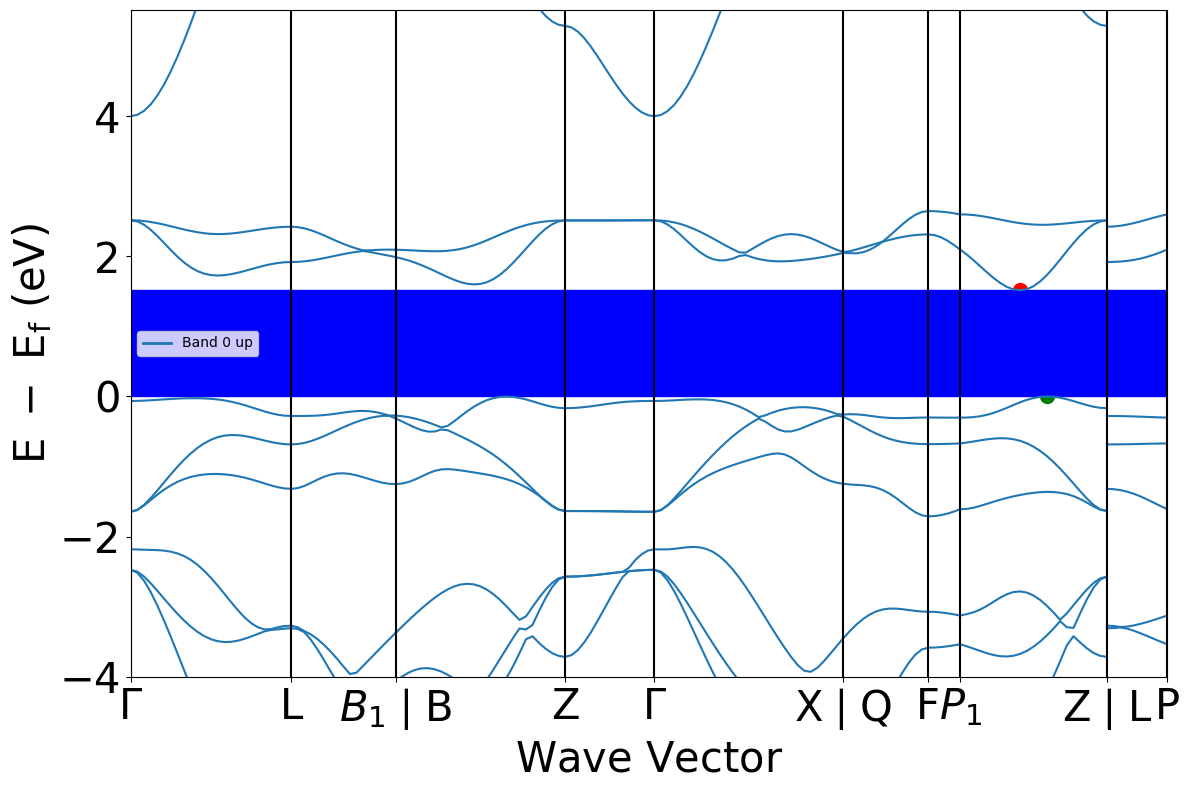

In [4]:
# Obtenir les informations sur la bande interdite
band_gap = band.get_band_gap()
bsplotter = BSPlotter(band)


data = bsplotter.bs_plot_data()
energy = band_gap.get('energy')
distance = data.get('ticks').get('distance')

bsplotter.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(distance[0], distance[-1], 2), 0, energy, color = "blue")

print(f"La bande interdite est de {band_gap['energy']} eV")
print(f"Le gap est {'direct' if band_gap['direct'] else 'indirect'}")
print(f"Transition: {band_gap['transition']}")

Les résultats montrent que la bande interdite est de **1.515 eV**, ce qui suggère que LiRhO₂ pourrait être considéré comme un semi-conducteur. Le fait que le gap soit indirect indique que l'absorption et l'émission de lumière (processus de recombinaison) sont moins efficaces que dans les matériaux à gap direct, car une transition indirecte nécessite la participation d'un phonon pour satisfaire la conservation du moment cinétique.

La transition s'effectue entre les points de k-space **(0.563, 0.563, 0.373)** et **(0.591, 0.591, 0.317)**. Ces points correspondent à des positions de haute symétrie dans la zone de Brillouin et sont caractéristiques de la géométrie cristalline du matériau.




## 2 - Analyse de la dispersion des bandes

La dispersion des bandes (c'est-à-dire la variation de l'énergie en fonction du vecteur d'onde \(k\)) est essentielle pour comprendre le comportement de porteurs de charge dans le matériau. Une grande dispersion (forte pente) indique une forte interaction entre les atomes, ce qui se traduit par une faible masse effective et donc une mobilité plus élevée des électrons ou des trous.

Dans ce notebook, nous analysons la dispersion de la dernière bande de valence (VBM) et de la première bande de conduction (CBM) en calculant la pente sur chaque segment de k-points. Nous déterminons ensuite les directions où la dispersion est maximale et minimale.

##### Données de la structure de bandes

In [5]:
data = bsplotter.bs_plot_data()
D = data.get('ticks').get('distance')

vbm = band.get_vbm()
cbm = band.get_cbm()
vbm_index = list(vbm['band_index'].values())[0][0]
cbm_index = list(cbm['band_index'].values())[0][0]

# Afficher sous forme de tableau
print("-" * 57)
print("| {:^15} | {:^15} | {:^15} |".format("Bande", "Indice", "Énergie (eV)"))
print("-" * 57)
print("| {:^15} | {:^15} | {:^15.4f} |".format("VBM", vbm_index, vbm['energy']))
print("| {:^15} | {:^15} | {:^15.4f} |".format("CBM", cbm_index, cbm['energy']))
print("-" * 57)

---------------------------------------------------------
|      Bande      |     Indice      |  Énergie (eV)   |
---------------------------------------------------------
|       VBM       |       14        |     4.4421      |
|       CBM       |       15        |     5.9574      |
---------------------------------------------------------


##### Direction de dispersion

Pour identifier les directions de dispersion, nous calculons la pente de la courbe d'énergie pour la bande de valence (VBM) et la bande de conduction (CBM) sur chaque segment entre deux k-points. La pente, calculée comme :

$slope = \frac{\Delta E}{\Delta k}$

est une mesure de la dispersion. Une pente élevée correspond à une dispersion forte (énergie variant rapidement avec \(k\)) et donc à une faible masse effective, tandis qu'une pente faible correspond à une dispersion faible (énergie presque constante) et à une masse effective élevée. Des flèches sont ajoutées sur la figure pour indiquer graphiquement ces directions.

Structures des bandes électroniques du matériau :


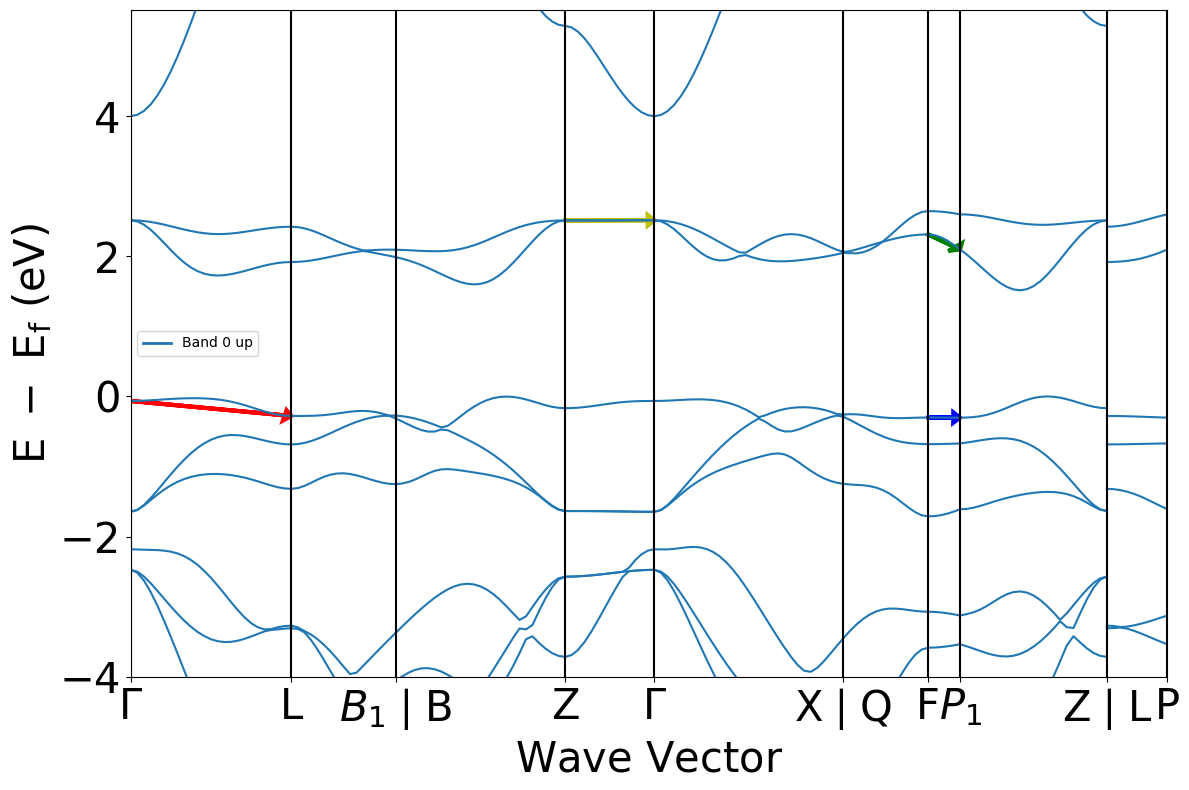


### Résultats des dispersions ###

**Bande de valence (VBM)**
- Dispersion maximale : Pente de 0.180 dans la direction Γ (flèche rouge)
- Dispersion minimale : Pente de 0.006 dans la direction Γ (flèche bleue)

**Bande de conduction (CBM)**
- Dispersion maximale : Pente de 0.909 dans la direction Γ (flèche verte)
- Dispersion minimale : Pente de 0.003 dans la direction B1|B (flèche jaune)



In [6]:
# Récupération des données de la structure de bande
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot()
E = data.get('energy').get('1')  # Énergies des bandes
D = data.get('ticks').get('distance')  # Distances k-points

# Détermination des indices de bande
Vindex = 14  # Dernière bande de valence
Cindex = 15  # Première bande de conduction

# Nettoyage des distances pour éviter les doublons
Dbranch = np.unique(D)
num_branches = len(Dbranch) - 1

# Initialisation des tableaux avec la bonne taille
slopeV = np.zeros(num_branches)
slopeC = np.zeros(num_branches)

# Calcul des dispersions (pentes)
for i in range(num_branches):
    DeltaD = Dbranch[i+1] - Dbranch[i]
    slopeV[i] = abs((E[i][Vindex][-1] - E[i][Vindex][0]) / DeltaD)
    slopeC[i] = abs((E[i][Cindex][-1] - E[i][Cindex][0]) / DeltaD)

# Identification des dispersions max et min
maxV = np.max(slopeV)
minV = np.min(slopeV)
maxC = np.max(slopeC)
minC = np.min(slopeC)

# Récupération des indices pour les flèches (attention à la taille réelle)
maxV_index = np.argmax(slopeV)
minV_index = np.argmin(slopeV)
maxC_index = np.argmax(slopeC)
minC_index = np.argmin(slopeC)


# Ajout des flèches sur le graphe
if maxV_index < num_branches:
    plt.arrow(Dbranch[maxV_index], E[maxV_index][Vindex][0], 
              Dbranch[maxV_index+1] - Dbranch[maxV_index], 
              E[maxV_index][Vindex][-1] - E[maxV_index][Vindex][0], 
              head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)

if minV_index < num_branches:
    plt.arrow(Dbranch[minV_index], E[minV_index][Vindex][0], 
              Dbranch[minV_index+1] - Dbranch[minV_index], 
              E[minV_index][Vindex][-1] - E[minV_index][Vindex][0], 
              head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)

if maxC_index < num_branches:
    plt.arrow(Dbranch[maxC_index], E[maxC_index][Cindex][0], 
              Dbranch[maxC_index+1] - Dbranch[maxC_index], 
              E[maxC_index][Cindex][-1] - E[maxC_index][Cindex][0], 
              head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)

if minC_index < num_branches:
    plt.arrow(Dbranch[minC_index], E[minC_index][Cindex][0], 
              Dbranch[minC_index+1] - Dbranch[minC_index], 
              E[minC_index][Cindex][-1] - E[minC_index][Cindex][0], 
              head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Structures des bandes électroniques du matériau :")
plt.show()

# Affichage des résultats
def replace_latex_notation(label):
    return label.replace('$\\Gamma$', 'Γ').replace('$\\mid$', '|').replace('$B_1$', 'B1').replace('$P_1$', 'P1').replace('$Z\\mid$L', 'Z|L')

print("\n### Résultats des dispersions ###\n")

print("**Bande de valence (VBM)**")
print(f"- Dispersion maximale : Pente de {maxV:.3f} dans la direction {replace_latex_notation(data['ticks']['label'][maxV_index])} (flèche rouge)")
print(f"- Dispersion minimale : Pente de {minV:.3f} dans la direction {replace_latex_notation(data['ticks']['label'][minV_index])} (flèche bleue)\n")

print("**Bande de conduction (CBM)**")
print(f"- Dispersion maximale : Pente de {maxC:.3f} dans la direction {replace_latex_notation(data['ticks']['label'][maxC_index])} (flèche verte)")
print(f"- Dispersion minimale : Pente de {minC:.3f} dans la direction {replace_latex_notation(data['ticks']['label'][minC_index])} (flèche jaune)\n")



# 3 - Calcul de la masse effective

La masse effective est un paramètre fondamental dans la physique des semi-conducteurs. Elle traduit comment un électron (ou un trou) réagit à un champ appliqué dans le cristal. Pour une dispersion parabolique, l'équation de la masse effective $m^*$ peut s'écrire

\begin{equation}
    m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}
\end{equation}

avec $\hbar$ la constante réduite de Planck égale à $6.582 \times 10^{-16} eVs$.

Pour des états proches des maxima et minima de bande, cette équation peut être approximée par

\begin{equation}
    E(k)-E_0=\pm \frac{\hbar^2}{2m^*}(k_x^2+k_y^2+k_z^2).
\end{equation}

In [7]:
h_bar = hbar / 1.602176634e-19          # Conversion de h_bar de J*s à eV*s (constante de Planck réduite)
m_e = 9.10938356e-31                    # Masse d'un électron en kg

print(f"Masse d'un électron : {m_e:.2e} kg")

Masse d'un électron : 9.11e-31 kg


#### Bande de valence

Nous calculons ici la masse effective au sommet de la dernière bande de valence. La méthode consiste à utiliser la relation parabolique simplifiée pour estimer $m^*$ à partir de la variation d'énergie et du vecteur d'onde à proximité du sommet.

In [8]:
VBM = band.get_vbm()                    # Sommet de la dernière bande de valence
kpoint = VBM['kpoint'].frac_coords      # Coordonnées fractionnaires du sommet de la dernière bande de valence
E_VBM = VBM['energy']                   # Énergie du sommet de la dernière bande de valence
k_VBM = vbm["kpoint"].cart_coords       # Coordonnées cartésiennes du sommet de la dernière bande de valence

# Calcul de la masse effective du sommet de la dernière bande de valence
m_e_VBM = (h_bar ** 2 * ((k_VBM[2] ** 2 + k_VBM[1] ** 2 + k_VBM[0] ** 2))) / (2 * E_VBM)

print(f"Sommet de la dernière bande de valence : {kpoint} avec une énergie de {E_VBM} eV")
print(f"La masse effective du sommet de la dernière bande de valence est {m_e_VBM} kg")

Sommet de la dernière bande de valence : [0.56334127 0.56334127 0.37331747] avec une énergie de 4.4421 eV
La masse effective du sommet de la dernière bande de valence est 3.109326479339801e-32 kg


#### Bande de conduction

De la même manière, nous calculons la masse effective au minimum de la première bande de conduction. La valeur obtenue fournit une estimation de la facilité avec laquelle un électron peut être accéléré par un champ externe dans la région du minimum de conduction.

In [9]:
CBM = band.get_cbm()                    # Minimum de la première bande de conduction
kpoint_CBM = CBM['kpoint'].frac_coords  # Coordonnées fractionnaires du minimum de la première bande de conduction
E_CBM = CBM['energy']                   # Énergie du minimum de la première bande de conduction
k_CBM = cbm["kpoint"].cart_coords       # Coordonnées cartésiennes du minimum de la première bande de conduction

# Calcul de la masse effective du minimum de la première bande de conduction
m_e_CBM = (h_bar ** 2 * ((k_CBM[2] ** 2 + k_CBM[1] ** 2 + k_CBM[0] ** 2))) / (2* E_CBM)

print(f"Minimum de la première bande de conduction : {kpoint_CBM} avec une énergie de {E_CBM} eV")
print(f"La masse effective du minimum de la première bande de conduction est {m_e_CBM} kg")

Minimum de la première bande de conduction : [0.59149294 0.59149294 0.31701412] avec une énergie de 5.9574 eV
La masse effective du minimum de la première bande de conduction est 3.102666114454879e-32 kg


Les valeurs calculées pour la masse effective au sommet de la bande de valence et au minimum de la bande de conduction indiquent que, dans ces régions, les porteurs de charge (trous et électrons respectivement) possèdent une faible inertie effective. Cela peut se traduire par une mobilité élevée, ce qui est un paramètre crucial pour la performance des dispositifs semi-conducteurs.

Notons toutefois que l'approximation parabolique est une simplification et que des analyses plus fines peuvent être nécessaires pour des études quantitatives précises.


## Conclusion

Nous avons réalisé une analyse complète de la structure de bandes de LiRhO₂. Les points clés sont :

- **Bande interdite** : Un gap de 1.515 eV (indirect) qui implique des transitions nécessitant l'intervention de phonons, caractéristique des semi-conducteurs indirects.
- **Dispersion** : L'analyse de la dispersion a permis d'identifier les directions avec une forte (faible masse effective) et une faible dispersion pour le VBM et le CBM, ce qui est essentiel pour évaluer la mobilité des porteurs.
- **Masse effective** : Les calculs effectués indiquent une masse effective très faible au niveau du sommet de la bande de valence et du minimum de la bande de conduction, suggérant une bonne mobilité des porteurs dans ces régions.